The CRISP-DM Process (Cross Industry Process for Data Mining).

### 1. Business Understanding

1. What is your desire next year?

### 2. Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
df = pd.read_csv('./data/developer_survey_2018/survey_results_public.csv')
schema = pd.read_csv('./data/developer_survey_2018/survey_results_schema.csv')

df.head()

/Users/fc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


### 3. Prepare Data

In [3]:
df_new = pd.read_pickle('./data/survey_results_public_cat.p')

df_new.shape

(98855, 887)

In [4]:
df_new.head()

,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,...,MilitaryUS_No,MilitaryUS_Yes,SurveyTooLong_The survey was an appropriate length,SurveyTooLong_The survey was too long,SurveyTooLong_The survey was too short,SurveyEasy_Neither easy nor difficult,SurveyEasy_Somewhat difficult,SurveyEasy_Somewhat easy,SurveyEasy_Very difficult,SurveyEasy_Very easy
0,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,...,0,0,1,0,0,0,0,0,0,1
1,1.0,7.0,10.0,8.0,2.0,5.0,4.0,3.0,6.0,9.0,...,0,0,1,0,0,0,0,1,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,0,0,0,1,0,0
4,8.0,5.0,7.0,1.0,2.0,6.0,4.0,3.0,10.0,9.0,...,0,0,1,0,0,0,0,1,0,0


### 4. Model Data

In [5]:
devtype = [col for col in df_new if col.startswith('DevType_')]

In [6]:
language = [col for col in df_new if col.startswith('LanguageWorkedWith_')]
language_desire = [col for col in df_new if col.startswith('LanguageDesireNextYear_')]

dt_lang_desire_df = df_new[devtype + language + language_desire]
dt_lang_desire_df = dt_lang_desire_df.dropna()

dt_lang_desire_df.shape

(71533, 96)

In [7]:
dt_lang_desire_df.head()

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,...,LanguageDesireNextYear_R,LanguageDesireNextYear_Ruby,LanguageDesireNextYear_Rust,LanguageDesireNextYear_SQL,LanguageDesireNextYear_Scala,LanguageDesireNextYear_Swift,LanguageDesireNextYear_TypeScript,LanguageDesireNextYear_VB.NET,LanguageDesireNextYear_VBA,LanguageDesireNextYear_Visual Basic 6
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
database = [col for col in df_new if col.startswith('DatabaseWorkedWith_')]
database_desire = [col for col in df_new if col.startswith('DatabaseDesireNextYear_')]

dt_db_desire_df = df_new[devtype + database + database_desire]
dt_db_desire_df = dt_db_desire_df.dropna()

dt_db_desire_df.shape

(54014, 62)

In [9]:
dt_db_desire_df.head()

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,...,DatabaseDesireNextYear_Memcached,"DatabaseDesireNextYear_Microsoft Azure (Tables, CosmosDB, SQL, etc)",DatabaseDesireNextYear_MongoDB,DatabaseDesireNextYear_MySQL,DatabaseDesireNextYear_Neo4j,DatabaseDesireNextYear_Oracle,DatabaseDesireNextYear_PostgreSQL,DatabaseDesireNextYear_Redis,DatabaseDesireNextYear_SQL Server,DatabaseDesireNextYear_SQLite
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
platform = [col for col in df_new if col.startswith('PlatformWorkedWith_')]
platform_desire = [col for col in df_new if col.startswith('PlatformDesireNextYear_')]

dt_pf_desire_df = df_new[devtype + platform + platform_desire]
dt_pf_desire_df = dt_pf_desire_df.dropna()

dt_pf_desire_df.shape

(56539, 72)

In [11]:
dt_pf_desire_df.head()

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,...,PlatformDesireNextYear_Mainframe,PlatformDesireNextYear_Predix,PlatformDesireNextYear_Raspberry Pi,PlatformDesireNextYear_Salesforce,PlatformDesireNextYear_Serverless,PlatformDesireNextYear_SharePoint,PlatformDesireNextYear_Windows Desktop or Server,PlatformDesireNextYear_Windows Phone,PlatformDesireNextYear_WordPress,PlatformDesireNextYear_iOS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
framework = [col for col in df_new if col.startswith('FrameworkWorkedWith_')]
framework_desire = [col for col in df_new if col.startswith('FrameworkDesireNextYear_')]

dt_fw_desire_df = df_new[devtype + framework + framework_desire]
dt_fw_desire_df = dt_fw_desire_df.dropna()

dt_fw_desire_df.shape

(43582, 44)

In [13]:
dt_fw_desire_df.head()

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,...,FrameworkDesireNextYear_Cordova,FrameworkDesireNextYear_Django,FrameworkDesireNextYear_Hadoop,FrameworkDesireNextYear_Node.js,FrameworkDesireNextYear_React,FrameworkDesireNextYear_Spark,FrameworkDesireNextYear_Spring,FrameworkDesireNextYear_TensorFlow,FrameworkDesireNextYear_Torch/PyTorch,FrameworkDesireNextYear_Xamarin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5. Results

#### 5.1 Language

In [14]:
dt_lang_desire_perc = pd.DataFrame()

dt_lang_desire_perc['Language'] = dt_lang_desire_df[language].sum()/dt_lang_desire_df[language].shape[0]
dt_lang_desire_perc.index = language_desire
dt_lang_desire_perc['DesireLanguage'] = dt_lang_desire_df[language_desire].sum()/dt_lang_desire_df[language_desire].shape[0]
dt_lang_desire_perc.index = dt_lang_desire_perc.index.str.slice(23)
dt_lang_desire_perc['diff'] = dt_lang_desire_perc['DesireLanguage'] - dt_lang_desire_perc['Language']
dt_lang_desire_perc.sort_values(by='diff', inplace=True)

dt_lang_desire_perc.style.bar(subset=['diff'], align='mid', color=['#d65f5f', '#5fba7d'])


,Language,DesireLanguage,diff
HTML,0.68834,0.435757,-0.252583
CSS,0.655516,0.414396,-0.241119
SQL,0.574252,0.384592,-0.189661
JavaScript,0.703228,0.528106,-0.175122
Java,0.456167,0.3079,-0.148267
PHP,0.308082,0.167335,-0.140746
Bash/Shell,0.403464,0.283799,-0.119665
C,0.227392,0.138258,-0.0891337
C#,0.341619,0.279479,-0.0621392
VB.NET,0.0653964,0.0205779,-0.0448185


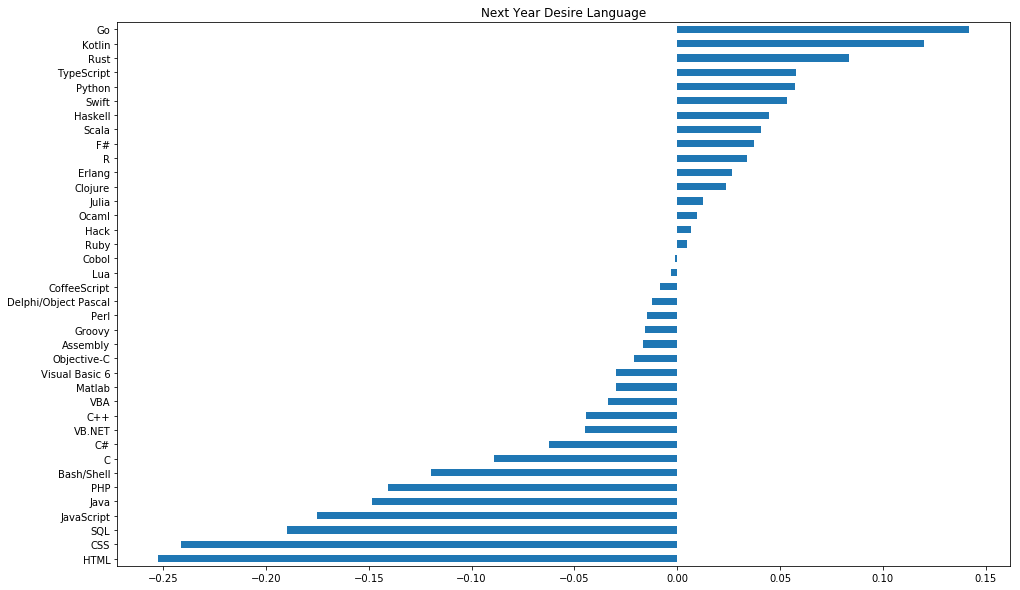

In [15]:
plt.figure(figsize = (16,10))
dt_lang_desire_perc['diff'].plot(kind='barh')
plt.title('Next Year Desire Language')
plt.show()

#### 5.2 Database

In [16]:
dt_db_desire_perc = pd.DataFrame()

dt_db_desire_perc['Database'] = dt_db_desire_df[database].sum()/dt_db_desire_df[database].shape[0]
dt_db_desire_perc.index = database_desire
dt_db_desire_perc['DesireDatabase'] = dt_db_desire_df[database_desire].sum()/dt_db_desire_df[database_desire].shape[0]
dt_db_desire_perc.index = dt_db_desire_perc.index.str.slice(23)
dt_db_desire_perc['diff'] = dt_db_desire_perc['DesireDatabase'] - dt_db_desire_perc['Database']
dt_db_desire_perc.sort_values(by='diff', inplace=True)

dt_db_desire_perc.style.bar(subset=['diff'], align='mid', color=['#d65f5f', '#5fba7d'])

,Database,DesireDatabase,diff
MySQL,0.592587,0.378346,-0.214241
SQL Server,0.416707,0.283297,-0.13341
SQLite,0.199596,0.147147,-0.0524494
Oracle,0.113526,0.0753693,-0.0381568
MariaDB,0.140519,0.127282,-0.0132373
IBM Db2,0.0249565,0.0151257,-0.00983078
Memcached,0.0586144,0.0640575,0.00544303
PostgreSQL,0.339023,0.354427,0.0154034
Apache HBase,0.0173288,0.0398786,0.0225497
Apache Hive,0.0220498,0.0457104,0.0236605


### 5.3 Platform

In [17]:
dt_pf_desire_perc = pd.DataFrame()

dt_pf_desire_perc['Platform'] = dt_pf_desire_df[platform].sum()/dt_pf_desire_df[platform].shape[0]
dt_pf_desire_perc.index = platform_desire
dt_pf_desire_perc['DesirePlatform'] = dt_pf_desire_df[platform_desire].sum()/dt_pf_desire_df[platform_desire].shape[0]
dt_pf_desire_perc.index = dt_pf_desire_perc.index.str.slice(23)
dt_pf_desire_perc['diff'] = dt_pf_desire_perc['DesirePlatform'] - dt_pf_desire_perc['Platform']
dt_pf_desire_perc.sort_values(by='diff', inplace=True)

dt_pf_desire_perc.style.bar(subset=['diff'], align='mid', color=['#d65f5f', '#5fba7d'])

,Platform,DesirePlatform,diff
Windows Desktop or Server,0.354587,0.266312,-0.0882753
WordPress,0.158811,0.0887175,-0.0700932
Heroku,0.10858,0.0984453,-0.0101346
Drupal,0.0304569,0.0208529,-0.00960399
SharePoint,0.0263889,0.0167849,-0.00960399
Windows Phone,0.0273616,0.0233467,-0.00401493
Salesforce,0.021808,0.0210828,-0.000725163
Linux,0.495516,0.496843,0.00132652
Predix,0.00157413,0.00339589,0.00182175
Mainframe,0.00749925,0.00948018,0.00198093


#### 5.4 Framework

In [18]:
dt_fw_desire_perc = pd.DataFrame()

dt_fw_desire_perc['Framework'] = dt_fw_desire_df[framework].sum()/dt_fw_desire_df[framework].shape[0]
dt_fw_desire_perc.index = framework_desire
dt_fw_desire_perc['DesireFramework'] = dt_fw_desire_df[framework_desire].sum()/dt_fw_desire_df[framework_desire].shape[0]
dt_fw_desire_perc.index = dt_fw_desire_perc.index.str.slice(24)
dt_fw_desire_perc['diff'] = dt_fw_desire_perc['DesireFramework'] - dt_fw_desire_perc['Framework']
dt_fw_desire_perc.sort_values(by='diff', inplace=True)

dt_fw_desire_perc.style.bar(subset=['diff'], align='mid', color=['#d65f5f', '#5fba7d'])

,Framework,DesireFramework,diff
Angular,0.382956,0.348768,-0.0341884
Spring,0.179088,0.158988,-0.0201
Cordova,0.0877197,0.0717957,-0.015924
.NET Core,0.274379,0.284383,0.0100041
Django,0.131476,0.156968,0.0254922
Node.js,0.50273,0.529301,0.0265706
Xamarin,0.0729888,0.114703,0.0417145
Spark,0.0488963,0.100523,0.0516268
Torch/PyTorch,0.01636,0.0713368,0.0549768
Hadoop,0.0472213,0.110481,0.0632601


### 6. Deploy

From the result, we can find that even though Go is not that polular but it is the most desire language next year. The most desired database is Elasticsearch. The most desired platform is Raspberry Pi. The most desired framework is TensorFlow.